## 용어
- 응답변수,반응변수(response variable): 예측하고자 하는 변수(유의어: 종속변수, 변수 Y, 목표, 출력)
- 독립변수(independent variable): 응답치를 예측하기 위해 사용되는 변수(유의어: 예측변수, 변수 X, 피쳐, 속성)
- 레코드(record): 한 특정 경우에 대한 입력과 출력을 담고 있는 벡터(유의어: 행, 사건, 예시(instance), 예제(example))
- 절편(intercept): 회귀직선의 절편, 즉 X=0일때 예측값
- 회귀계수(regression coeffciect): 회귀직선의 기울기(유의어:기울기(slope), 가중치)
- 적합값(fitted value): 회귀선으로부터 얻은 추정치(유의어: 예측값)
- 잔차(residual): 관측값과 적합값의 차이(유의어: 오차)
- 최소제곱(least square): 잔차의 제곱합(RSS)을 최소화하여 회귀를 피팅하는 방법(유의어:OLS, 보통최소제곱)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
lung = pd.read_csv('../../data/LungDisease.csv')

In [3]:
lung

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1
...,...,...
117,450,22
118,490,22
119,500,22
120,370,23


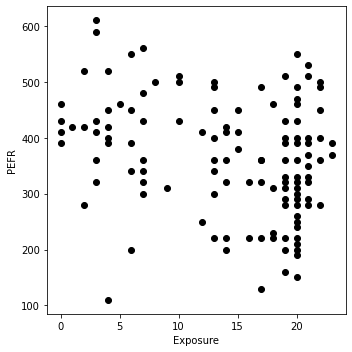

In [9]:
# 면진에 노출된 연수와 폐활량의 산점도

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x=lung['Exposure'], y=lung['PEFR'], color='black')
ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')

plt.tight_layout()
plt.show()

In [34]:
# 선형 회귀 함수 피팅
model = LinearRegression()
model.fit(np.array(lung['Exposure']).reshape((-1, 1)), lung['PEFR'])

print(f'Intercept: {model.intercept_:.3f}')            # 절편(편향) 
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')   # 계수(기울기)

Intercept: 424.583
Coefficient Exposure: -4.185


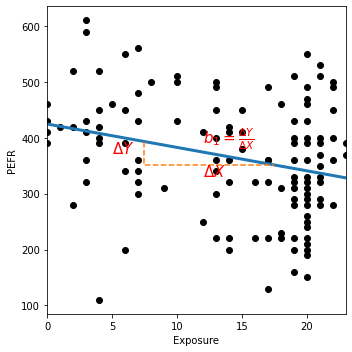

In [49]:
# 회귀선
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x=lung['Exposure'], y=lung['PEFR'], color='black')
ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')

ax.set_xlim([0, 23])
ax.plot([0, 23], model.predict([[0], [23]]), linewidth=3)

x = [[7.5], [17.5]]
y = model.predict(x)
ax.plot((7.5, 7.5, 17.5), (y[0], y[1], y[1]), '--')
ax.text(5, np.mean(y), r'$\Delta Y$', color='red', fontsize=15)
ax.text(12, y[1] - 20, r'$\Delta X$', color='red', fontsize=15)
ax.text(12, 390, r'$b_1 = \frac{\Delta Y}{\Delta X}$', color='red', fontsize=15)

plt.tight_layout()
plt.show()

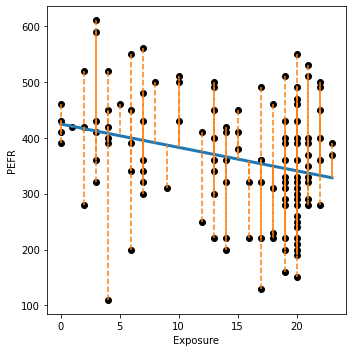

In [59]:
fitted = model.predict(np.array(lung['Exposure']).reshape((-1, 1))) # 적합값(fitted value), 예측값
residuals = lung['PEFR'] - fitted

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x=lung['Exposure'], y=lung['PEFR'], color='black')
ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')

ax.plot(lung['Exposure'], fitted, linewidth=3)

for x, yactual, yfitted in zip(lung['Exposure'], lung['PEFR'], fitted):
    ax.plot((x, x), (yactual, yfitted), linestyle='--', color='C1')

plt.tight_layout()
plt.show()